In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

stock_info = pd.read_csv("AAPL.csv", header = 0)
#Load the file into the program
stock_info

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400
...,...,...,...,...,...,...,...
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500


In [2]:
#Checking for missing values
missing_data = stock_info.isnull().sum()
print(missing_data)

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [3]:
#converting Date object class to datetime class
stock_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9909 non-null   object 
 1   Open       9909 non-null   float64
 2   High       9909 non-null   float64
 3   Low        9909 non-null   float64
 4   Close      9909 non-null   float64
 5   Adj Close  9909 non-null   float64
 6   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 542.0+ KB


In [4]:
stock_info['Date'] = pd.to_datetime(stock_info['Date'])

In [5]:
stock_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9909 entries, 0 to 9908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       9909 non-null   datetime64[ns]
 1   Open       9909 non-null   float64       
 2   High       9909 non-null   float64       
 3   Low        9909 non-null   float64       
 4   Close      9909 non-null   float64       
 5   Adj Close  9909 non-null   float64       
 6   Volume     9909 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 542.0 KB


In [6]:
#Making the Date column the index
stock_info.set_index('Date', inplace = True)
stock_info.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9909 entries, 1980-12-12 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       9909 non-null   float64
 1   High       9909 non-null   float64
 2   Low        9909 non-null   float64
 3   Close      9909 non-null   float64
 4   Adj Close  9909 non-null   float64
 5   Volume     9909 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 541.9 KB


In [7]:
stock_info.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [8]:
stock_info.sort_index(inplace = True)
stock_info

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400
...,...,...,...,...,...,...
2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100


In [9]:
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(stock_info[stock_info.columns])

In [10]:
scaled_values

array([[9.69775251e-04, 9.67382823e-04, 9.80847252e-04, 9.69299159e-04,
        7.67918183e-04, 6.30227653e-02],
       [8.94119040e-04, 8.85632201e-04, 8.97958702e-04, 8.87386505e-04,
        7.03023637e-04, 2.35161825e-02],
       [7.84073585e-04, 7.76631279e-04, 7.87440759e-04, 7.78169755e-04,
        6.16497546e-04, 1.40614092e-02],
       ...,
       [7.71985944e-01, 7.79247048e-01, 7.71161400e-01, 7.78626234e-01,
        7.78653845e-01, 2.24503966e-02],
       [7.86960927e-01, 8.00519617e-01, 7.79207129e-01, 7.77036025e-01,
        7.77063834e-01, 2.63620696e-02],
       [7.58921336e-01, 7.58493270e-01, 7.39380879e-01, 7.36119074e-01,
        7.36151986e-01, 2.35080965e-02]])

In [11]:
stock_scaled = pd.DataFrame(scaled_values, columns = stock_info.columns, index = stock_info.index)

In [12]:
stock_scaled

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.000970,0.000967,0.000981,0.000969,0.000768,0.063023
1980-12-15,0.000894,0.000886,0.000898,0.000887,0.000703,0.023516
1980-12-16,0.000784,0.000777,0.000787,0.000778,0.000616,0.014061
1980-12-17,0.000812,0.000811,0.000822,0.000812,0.000644,0.011462
1980-12-18,0.000853,0.000852,0.000863,0.000853,0.000676,0.009711
...,...,...,...,...,...,...
2020-03-26,0.758983,0.788891,0.761754,0.789727,0.789753,0.033786
2020-03-27,0.778179,0.780315,0.763889,0.757006,0.757036,0.027334
2020-03-30,0.771986,0.779247,0.771161,0.778626,0.778654,0.022450


In [13]:
#Creating the sequential blocks
window_size = 120 #Test different time block sizes
x = []
y = []

for i in range(window_size, len(stock_scaled)):
    x.append(stock_scaled.iloc[i-window_size:i].values)
    y.append(stock_scaled.iloc[i].values)

x, y = np.array(x), np.array(y)

In [14]:
x.shape, y.shape

((9789, 120, 6), (9789, 6))

In [15]:
#Setting up the training/testing data sets, 80/20 split
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]
x.shape, x_train.shape, x_test.shape

((9789, 120, 6), (7831, 120, 6), (1958, 120, 6))

In [16]:
#Setting up the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.4))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=40))
model.add(Dropout(0.2))

model.add(Dense(units=6)) #Six neurons for six columns

C:\Users\david\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 120, 50)             │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 120, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 120, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 120, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 120, 50)             │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 120, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 40)                  │          14,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 40)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6)                   │             246 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 66,606 (260.18 KB)

 Trainable params: 66,606 (260.18 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

In [19]:
model.fit(x_train, y_train, epochs=15, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/15
245/245 ━━━━━━━━━━━━━━━━━━━━ 27s 85ms/step - loss: 5.8043e-04 - mean_absolute_error: 0.0121 - val_loss: 0.0019 - val_mean_absolute_error: 0.0299
Epoch 2/15
245/245 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - loss: 2.9967e-04 - mean_absolute_error: 0.0083 - val_loss: 0.0114 - val_mean_absolute_error: 0.0827
Epoch 3/15
245/245 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - loss: 2.7790e-04 - mean_absolute_error: 0.0081 - val_loss: 0.0018 - val_mean_absolute_error: 0.0304
Epoch 4/15
245/245 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - loss: 2.7066e-04 - mean_absolute_error: 0.0076 - val_loss: 0.0036 - val_mean_absolute_error: 0.0424
Epoch 5/15
245/245 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - loss: 2.6487e-04 - mean_absolute_error: 0.0077 - val_loss: 0.0031 - val_mean_absolute_error: 0.0350
Epoch 6/15
245/245 ━━━━━━━━━━━━━━━━━━━━ 20s 82ms/step - loss: 2.5215e-04 - mean_absolute_error: 0.0073 - val_loss: 0.0046 - val_mean_absolute_error: 0.0374
Epoch 7/15
245/245 ━━━━━━━━━━━━━━━━━━━━ 20s 81ms/step - loss: 2.

In [20]:
predictions = model.predict(x_test)

62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step


In [21]:
predictions = scaler.inverse_transform(predictions)
actual_close = scaler.inverse_transform(y_test)

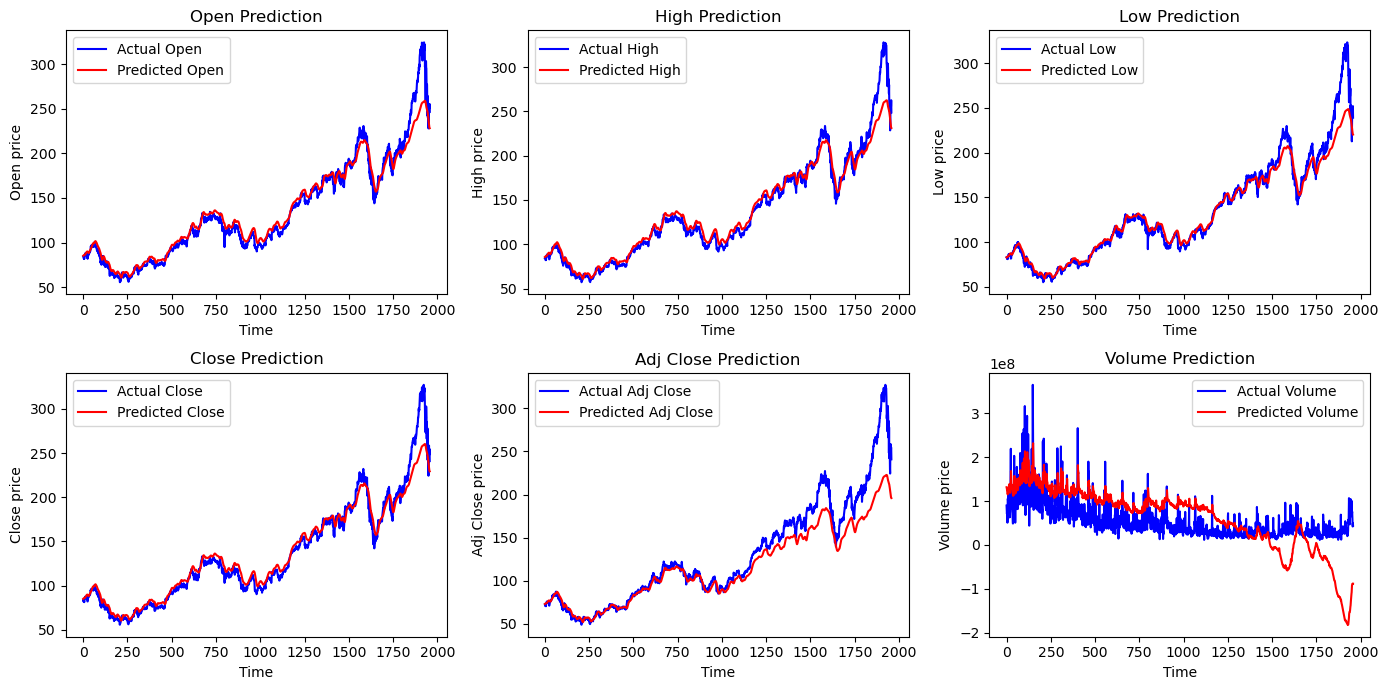

In [22]:
plt.figure(figsize = (14, 7))
for i, col in enumerate(stock_scaled.columns):
    plt.subplot(2, 3, i+1)
    plt.plot(actual_close[:,i], color='blue', label = f'Actual {col}')
    plt.plot(predictions[:,i], color = 'red', label = f'Predicted {col}')
    plt.title(f'{col} Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{col} price')
    plt.legend()

plt.tight_layout()

In [23]:
mse = mean_squared_error(actual_close, predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(actual_close, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 636275787953686.4
Root Mean Squared Error (RMSE): 25224507.685060702
Mean Absolute Error (MAE): 8052983.810060195


In [24]:
avg_price = np.mean(actual_close)
mae_percentage = (mae / avg_price) * 100
rmse_percentage = (rmse / avg_price) * 100
print(f"MAE as % of Average Price: {mae_percentage:.2f}%")
print(f"RMSE as % of Average Price: {rmse_percentage:.2f}%")

MAE as % of Average Price: 89.00%
RMSE as % of Average Price: 278.78%
